In [1]:
from label_studio_sdk import Client
from itertools import islice
import requests
import json

In [ ]:

LS_URL      = "https://ls.kpi.kul.pl/"
API_TOKEN   = ""
PROJECT_ID  = 1                          # <- replace
CHUNK_SIZE  = 200                         # keep the request small

ls = Client(url=LS_URL, api_key=API_TOKEN)
project = ls.get_project(PROJECT_ID)


In [3]:
tasks = project.get_tasks()


[{'id': 33050,
  'predictions': [{'id': 108,
    'result': [{'type': 'rectanglelabels',
      'score': 1.0,
      'value': {'x': 88.40052356020942,
       'y': 73.0,
       'width': 4.1989528795811575,
       'height': 1.5999999999999934,
       'rectanglelabels': ['dedication']},
      'to_name': 'image',
      'from_name': 'label',
      'image_rotation': 0,
      'original_width': 764,
      'original_height': 1240}],
    'model_version': 'LayoutLMv3Backend-v0.0.1',
    'created_ago': '5\xa0days, 21\xa0hours',
    'score': 0.0,
    'cluster': None,
    'neighbors': None,
    'mislabeling': 0.0,
    'created_at': '2025-05-06T10:59:37.405834Z',
    'updated_at': '2025-05-06T10:59:37.405839Z',
    'model': None,
    'model_run': None,
    'task': 33050,
    'project': 1}],
  'annotations': [{'id': 52,
    'result': [{'id': 'qA-ZkROy62',
      'type': 'rectanglelabels',
      'score': 1,
      'value': {'x': 88.40052356020942,
       'y': 73,
       'width': 4.1989528795811575,
       '
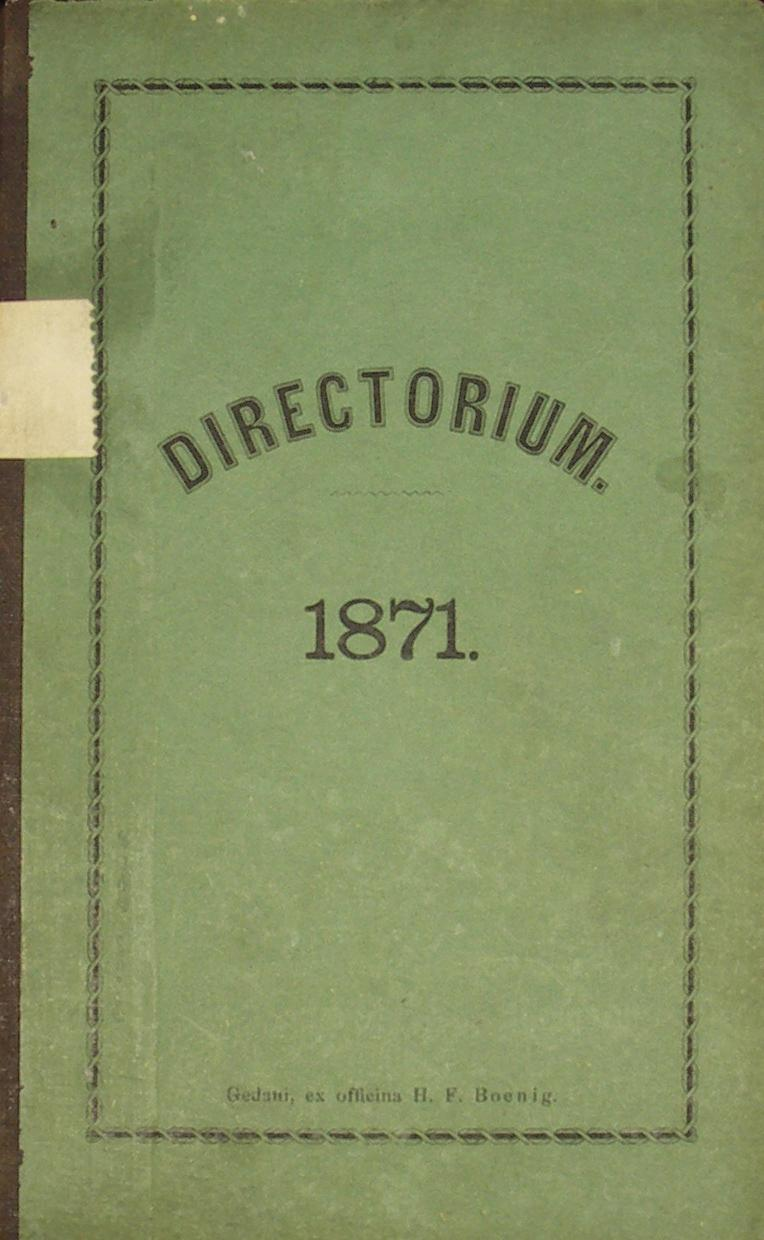
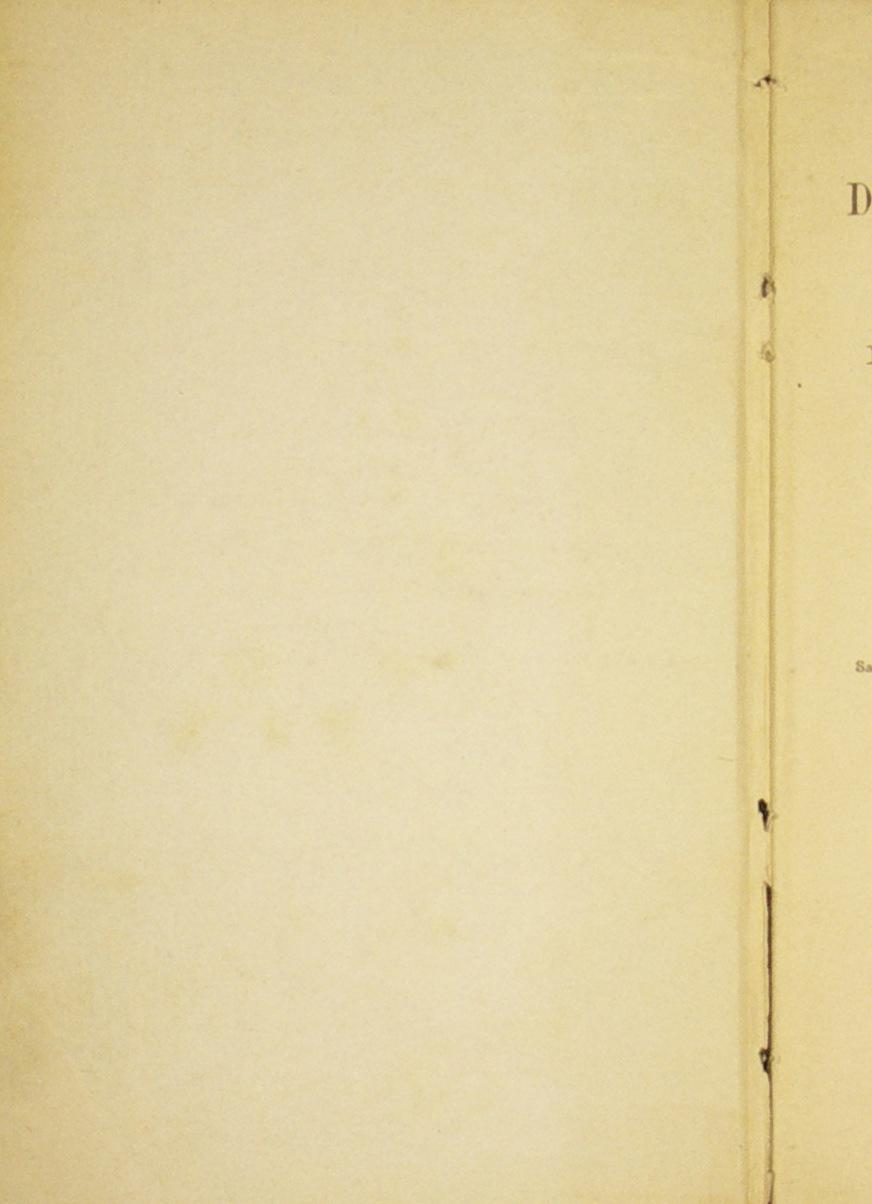
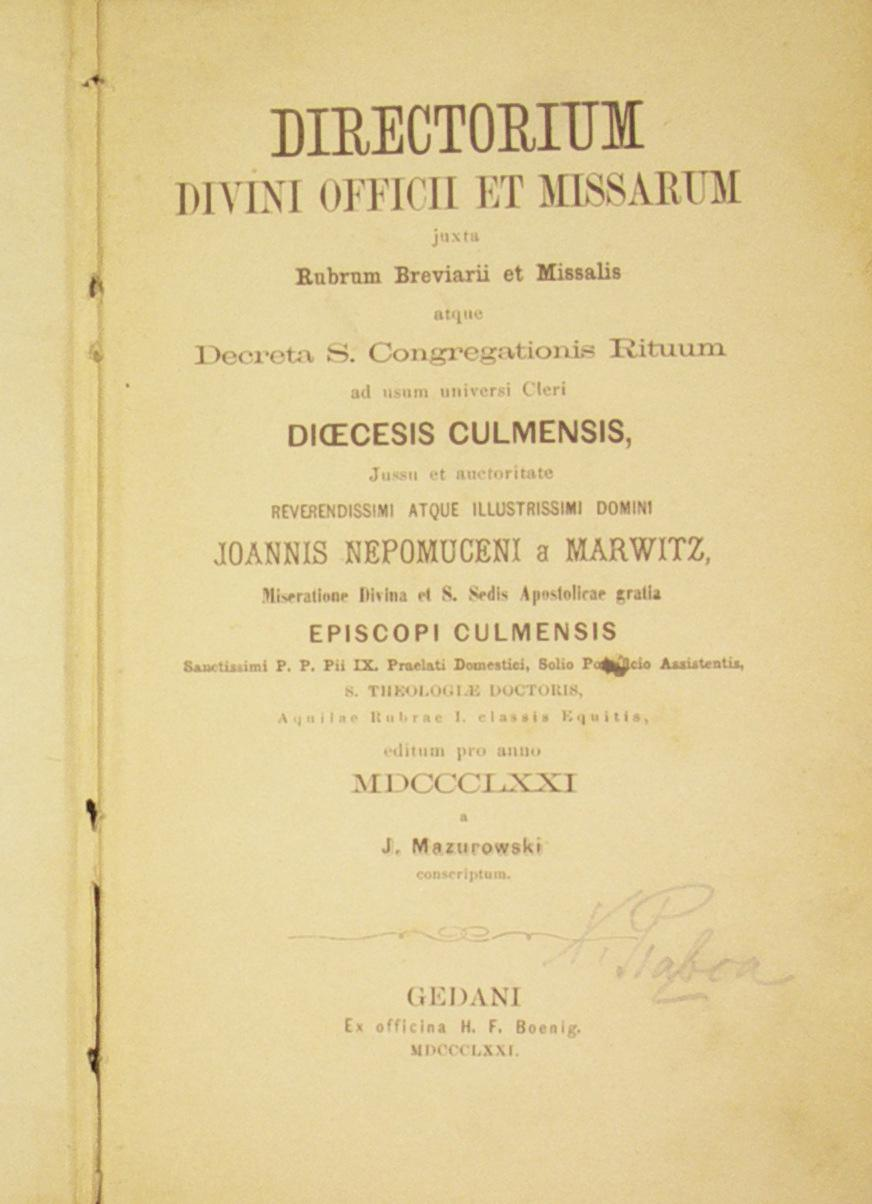
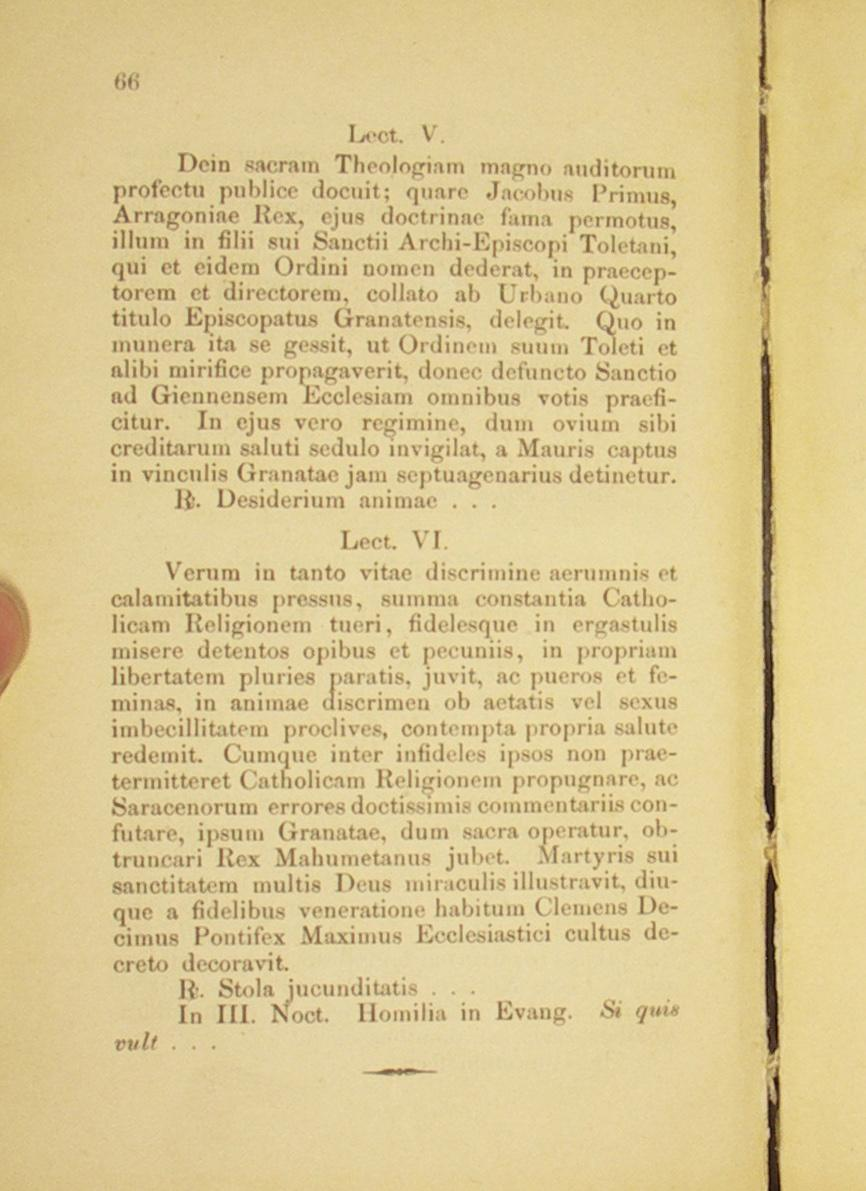
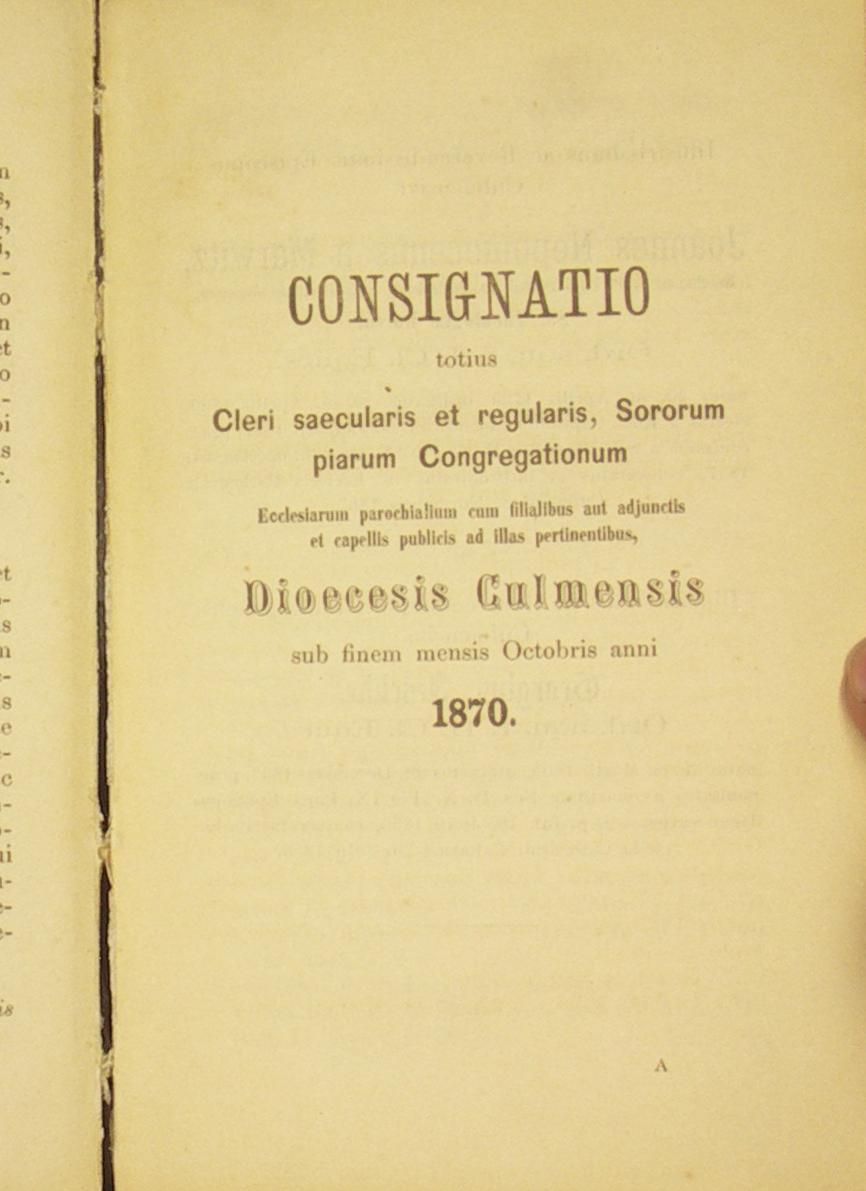

In [7]:
tasks[0:5]

In [ ]:

# 1) fetch every task id in the project
tasks = [task for task in project.get_tasks()]


In [ ]:
len(tasks)

In [13]:
wloclawek_tasks = []
for task in tasks:
    if "wloclawek_1873" in task["storage_filename"]:
        wloclawek_tasks.append(task)

sample = wloclawek_tasks[12]


In [ ]:
import requests

#curl https://localhost:8080/api/ml?project={project_id} -H 'Authorization: Token abc123'


url = "http://localhost:8080"
token = "a05568df38575e66bb3882730b388a0af548fb22"

url = f"{url}/api/ml?project={PROJECT_ID}"
headers = {
    "Authorization": f"Token {token}",
    "Content-Type": "application/json",
}


print("start prediction.........")
response = requests.get(url, headers=headers)
response.json()

In [6]:
# test prediction on one task
# POST http://host.docker.internal:9090/predict

# {
#   "tasks": [
#     {
#       "id": 2227,
#       "data": {
#         "image": "s3://schematyzmy/chelmno_1904/0657.jpg"
#       },
#       "meta": {},
#       "created_at": "2025-05-03T09:02:50.169549Z",
#       "updated_at": "2025-05-03T09:02:50.169555Z",
#       "is_labeled": false,
#       "overlap": 1,
#       "inner_id": 875,
#       "total_annotations": 0,
#       "cancelled_annotations": 0,
#       "total_predictions": 0,
#       "comment_count": 0,
#       "unresolved_comment_count": 0,
#       "last_comment_updated_at": null,
#       "project": 1,
#       "updated_by": null,
#       "file_upload": null,
#       "comment_authors": [],
#       "annotations": [],
#       "predictions": []
#     }
#   ],
#   "project": "1.1745846845",
#   "label_config": "<View>\n  <Image name=\"image\" value=\"$image\"/>\n  <RectangleLabels name=\"label\" toName=\"image\">\n    \n    \n  <Label value=\"parish\" background=\"#f10200\"/><Label value=\"page_number\" background=\"#f163e1\"/><Label value=\"dedication\" background=\"#feff00\"/><Label value=\"deanery\" background=\"#FFA39E\"/><Label value=\"settlement_classification\" background=\"#00bfc3\"/><Label value=\"building_material\" background=\"#FFC069\"/></RectangleLabels>\n</View>",
#   "params": {
#     "login": null,
#     "password": null,
#     "context": null
#   }
# }

In [ ]:
sample

In [ ]:
import json

ML_BACKEND_URL = "http://localhost:9090"
PREDICT_URL = f"{ML_BACKEND_URL}/predict"

headers = {
    "Authorization": f"Token {API_TOKEN}",
    "Content-Type": "application/json",
}
prediction_payload = {
    "tasks": [sample],
    "project": 1,  # Using the project ID directly from the SDK object
    "label_config": project.label_config, # Get label config from the SDK object
    "params": {             # Based on the example provided
        "login": None,
        "password": None,
        "context": None
    }
}

# --- Now you can use this payload with requests ---
# Example:
# ml_backend_url = "http://host.docker.internal:9090/predict"
# headers = {'Content-Type': 'application/json'} # Important for POST
# response = requests.post(ml_backend_url, json=prediction_payload, headers=headers)

# Optional: Print the payload as a JSON string to verify
print(json.dumps(prediction_payload, indent=2))
response = requests.post(PREDICT_URL, headers=headers, json=prediction_payload)
response.json()

In [ ]:
sample

In [30]:
headers = {
    "Authorization": f"Token {API_TOKEN}",
    "Content-Type": "application/json",
}
sample = wloclawek_tasks[12]

def send_predictions_batch(tasks_batch: list):

  for task in tasks_batch:
    task["data"]["image"] = task["data"]["image"].replace("localhost", "services")

  hardcoded_payload = {
    "tasks": tasks_batch,
    "project": "1",
    "label_config": "<View>\n  <Image name=\"image\" value=\"$image\"/>\n  <RectangleLabels name=\"label\" toName=\"image\">\n    \n    \n  <Label value=\"parish\" background=\"#f10200\"/><Label value=\"page_number\" background=\"#f163e1\"/><Label value=\"dedication\" background=\"#feff00\"/><Label value=\"deanery\" background=\"#FFA39E\"/><Label value=\"settlement_classification\" background=\"#00bfc3\"/><Label value=\"building_material\" background=\"#FFC069\"/></RectangleLabels>\n</View>",
    "params": {
      "login": False,
      "password": False,
      "context": False
    }
  }
  response = requests.post(PREDICT_URL, headers=headers, json=hardcoded_payload)
  # project.create_predictions(
  #     task_id=task["id"],
  #     predictions=response.json()["predictions"]
  # )

  predictions_to_upload = []
  for task, prediction in zip(tasks_batch, response.json()["results"]):
        predictions_to_upload.append({
            "task": task["id"],
            "result": prediction.get("result", []),
            "score": prediction.get("score", 0.0),
            "model_version": prediction.get("model_version", "unknown")
        })

  upload_response = project.create_predictions(
     predictions=predictions_to_upload,
  )

  return upload_response


result = send_predictions_batch([wloclawek_tasks[11]])

In [ ]:
response.json()["results"]